In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.transform import Rotation
from tqdm import tqdm

In [102]:
original_df = pd.read_hdf(r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\chr8_day3DLC_resnet152_dlc_realApr6shuffle4_110000.h5")
original_df.columns = original_df.columns.droplevel(0)
main_df = pd.read_hdf(r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\chr8_day3DLC_resnet152_dlc_realApr6shuffle4_110000.h5")
main_df.columns = main_df.columns.droplevel(0)
df = main_df
df.head()

bodyparts   left_ear                        right_ear                        \
coords             x          y likelihood          x          y likelihood   
90767     -51.070063 -33.490821   0.867884 -56.075555 -55.667231   0.901903   

bodyparts      snout                       center  ... paw_f_left paw_h_right  \
coords             x          y likelihood      x  ... likelihood           x   
90767     -78.833311 -71.486274   0.677199    0.0  ...   0.094388   49.542537   

bodyparts                     paw_h_left                         tail_tip  \
coords           y likelihood          x          y likelihood          x   
90767      51.0343   0.148518  47.962695  52.239334   0.153005 -95.172129   

bodyparts                         
coords              y likelihood  
90767     -132.058715    0.74605  

[1 rows x 39 columns]

In [3]:
original_df = pd.read_hdf(r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\chr8_day3DLC_resnet152_dlc_realApr6shuffle4_110000.h5")
original_df.columns = original_df.columns.droplevel(0)
# original_df

In [4]:
print('df.columns.levels[0]:', df.columns.levels[0])
df.columns.levels

df.columns.levels[0]: Index(['center', 'left_ear', 'left_side', 'paw_f_left', 'paw_f_right',
       'paw_h_left', 'paw_h_right', 'right_ear', 'right_side', 'snout',
       'tail_base', 'tail_mid', 'tail_tip'],
      dtype='object', name='bodyparts')


FrozenList([['center', 'left_ear', 'left_side', 'paw_f_left', 'paw_f_right', 'paw_h_left', 'paw_h_right', 'right_ear', 'right_side', 'snout', 'tail_base', 'tail_mid', 'tail_tip'], ['likelihood', 'x', 'y']])

In [5]:
# pd.options.mode.chained_assignment = None  # default='warn'

center = df['center']

for bodypart in df.columns.levels[0]:
    for axis in df.columns.levels[1][1:]:
        df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)] - center.loc[:, axis]
        
df

bodyparts   left_ear                        right_ear                        \
coords             x          y likelihood          x          y likelihood   
0          45.671768 -32.653137   0.665878  48.459457  13.790466   0.912561   
1          41.839691 -35.413803   0.634811  49.546875  11.223999   0.959785   
2          44.309326 -39.704681   0.770484  49.706024   8.924835   0.970840   
3          42.450760 -41.041794   0.888424  50.855850   7.756287   0.947360   
4          43.912064 -41.226440   0.829050  53.070877   7.863708   0.865554   
...              ...        ...        ...        ...        ...        ...   
107995     36.468597  40.029602   0.966664   1.130417  57.036560   0.958417   
107996     36.359238  39.656433   0.963033   1.050842  56.747498   0.956459   
107997     36.510834  38.065552   0.961830   2.434769  58.712891   0.952838   
107998     36.158936  38.614197   0.962249   2.108368  59.335022   0.951517   
107999     36.337860  38.458374   0.963906   2.252960  59.010376   0.954171   

bodyparts      snout                       center  ... paw_f_left paw_h_right  \
coords             x          y likelihood      x  ... likelihood           x   
0          90.879959  18.072876   0.586905    0.0  ...   0.056478   31.010178   
1          86.057892  16.477692   0.425324    0.0  ...   0.033244   20.847748   
2          59.635010 -56.605606   0.180888    0.0  ...   0.028110   15.048203   
3          55.969620 -56.705109   0.241777    0.0  ...   0.038318   15.270950   
4          57.203964 -56.311386   0.304871    0.0  ...   0.037902   15.102753   
...              ...        ...        ...    ...  ...        ...         ...   
107995     27.203415  70.477417   0.978513    0.0  ...   0.077618  -52.742584   
107996     27.119247  69.983826   0.978951    0.0  ...   0.074090  -52.507324   
107997     25.913620  70.717102   0.975597    0.0  ...   0.103704  -51.776367   
107998     25.545044  71.305359   0.974916    0.0  ...   0.101462  -52.583862   
107999     25.646194  71.139709   0.976204    0.0  ...   0.090067  -51.901657   

bodyparts                       paw_h_left                         tail_tip  \
coords             y likelihood          x          y likelihood          x   
0          41.143372   0.128356   9.575180 -51.198334   0.216726  20.065308   
1          43.529877   0.649704   5.788055 -51.672150   0.276334  11.863205   
2          45.311523   0.753278  15.522415  48.828033   0.219428   6.392090   
3          46.527100   0.802185  14.675873  50.946075   0.261315   4.391708   
4          48.838013   0.779997  14.975800  54.319763   0.223375   6.743942   
...              ...        ...        ...        ...        ...        ...   
107995     24.480408   0.709026 -50.661621  23.807861   0.300801 -36.534363   
107996     23.812073   0.702727 -50.630020  23.110107   0.294965 -36.537766   
107997     24.652649   0.725596 -49.839905  23.338562   0.384494 -46.256439   
107998     24.683350   0.703014 -50.364838  23.450378   0.354559 -47.602325   
107999     24.646606   0.702272 -49.936783  23.514771   0.357698 -46.652084   

bodyparts                         
coords              y likelihood  
0         -146.939667   0.987379  
1         -147.029053   0.985695  
2         -147.593857   0.977671  
3         -146.099762   0.977436  
4         -142.138733   0.976100  
...               ...        ...  
107995    -351.043549   0.098983  
107996    -351.492615   0.128616  
107997     111.063354   0.130234  
107998     109.865845   0.110054  
107999     111.533752   0.112928  

[108000 rows x 39 columns]

In [6]:
rotated = pd.DataFrame(index=df.index, columns=df.columns)
angles = np.arctan2(df[('tail_base', 'y')], df['tail_base', 'x'])

for bodypart in tqdm(df.columns.levels[0]):
    bp_df = df.loc[:, bodypart]
    bp_x = bp_df['x']
    bp_y = bp_df['y']
    bp_likelihood = bp_df['likelihood']
    cos = np.cos(angles)
    sin = np.sin(angles)
    for axis in bp_df.columns:
        if axis == 'x':
            rotated.loc[:, (bodypart, axis)] = (bp_x * cos) - (bp_y * sin)
        elif axis == 'y':
            rotated.loc[:, (bodypart, axis)] = (bp_x * sin) - (bp_y * cos)
        elif axis == 'likelihood':
            rotated.loc[:, (bodypart, axis)] = bp_likelihood

rotated
df = rotated

100%|███████████████| 13/13 [00:01<00:00,  9.01it/s]


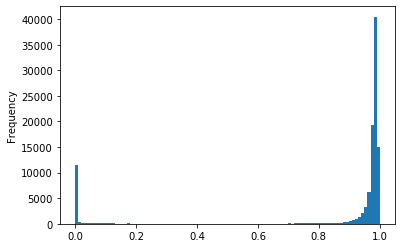

In [7]:
df['center']['likelihood'].plot.hist(bins=100)

In [8]:
high_center_likelihood = df.loc[df['center']['likelihood'] > 0.9, :]
high_tailbase_likelihood = high_center_likelihood.loc[high_center_likelihood['center']['likelihood'] > 0.9, :]

In [9]:
skeleton = [['snout', 'left_ear'], ['snout', 'right_ear'], ['right_ear', 'left_ear'], ['left_ear', 'left_side'],
           ['right_ear', 'right_side'], ['right_side', 'tail_base'], ['left_side', 'tail_base'],
            ['tail_base', 'tail_mid'], ['center', 'left_ear'], ['center', 'right_ear'],
           ['center', 'right_side'], ['left_side', 'center'], ['tail_base', 'center']]

In [99]:
def plotter(to_plot, skeleton, indexes, plot_original_df=False, original_df=None, lim_min=-800, lim_max=800, limits=True):
    plt.figure(figsize=(32,32))
    indexcounter=1
    for i in indexes:
        
        plt.subplot(4,4,indexcounter)
        
        for bp in df.columns.levels[0]:
            
            plt.scatter(x=to_plot.loc[i, (bp, 'x')], y=to_plot.loc[i, (bp, 'y')], cmap='jet', )
            if plot_original_df:
                plt.scatter(x=original_df.loc[i, (bp, 'x')], y=original_df.loc[i, (bp, 'y')], cmap='jet', marker='*')
        
        for bp_pair in skeleton:
            
            plt.plot([to_plot.loc[i, (bp_pair[0], 'x')], to_plot.loc[i, (bp_pair[1], 'x')]],
                    [to_plot.loc[i, (bp_pair[0], 'y')], to_plot.loc[i, (bp_pair[1], 'y')]],
                    color = 'k', linestyle='-', linewidth=1)
            if plot_original_df:
                plt.plot([original_df.loc[i, (bp_pair[0], 'x')], original_df.loc[i, (bp_pair[1], 'x')]],
                    [original_df.loc[i, (bp_pair[0], 'y')], original_df.loc[i, (bp_pair[1], 'y')]],
                    color = 'k', linestyle='-', linewidth=1)

        indexcounter +=1
        if limits:
            plt.xlim(lim_min, lim_max)
            plt.ylim(lim_min, lim_max)
        
    plt.show()

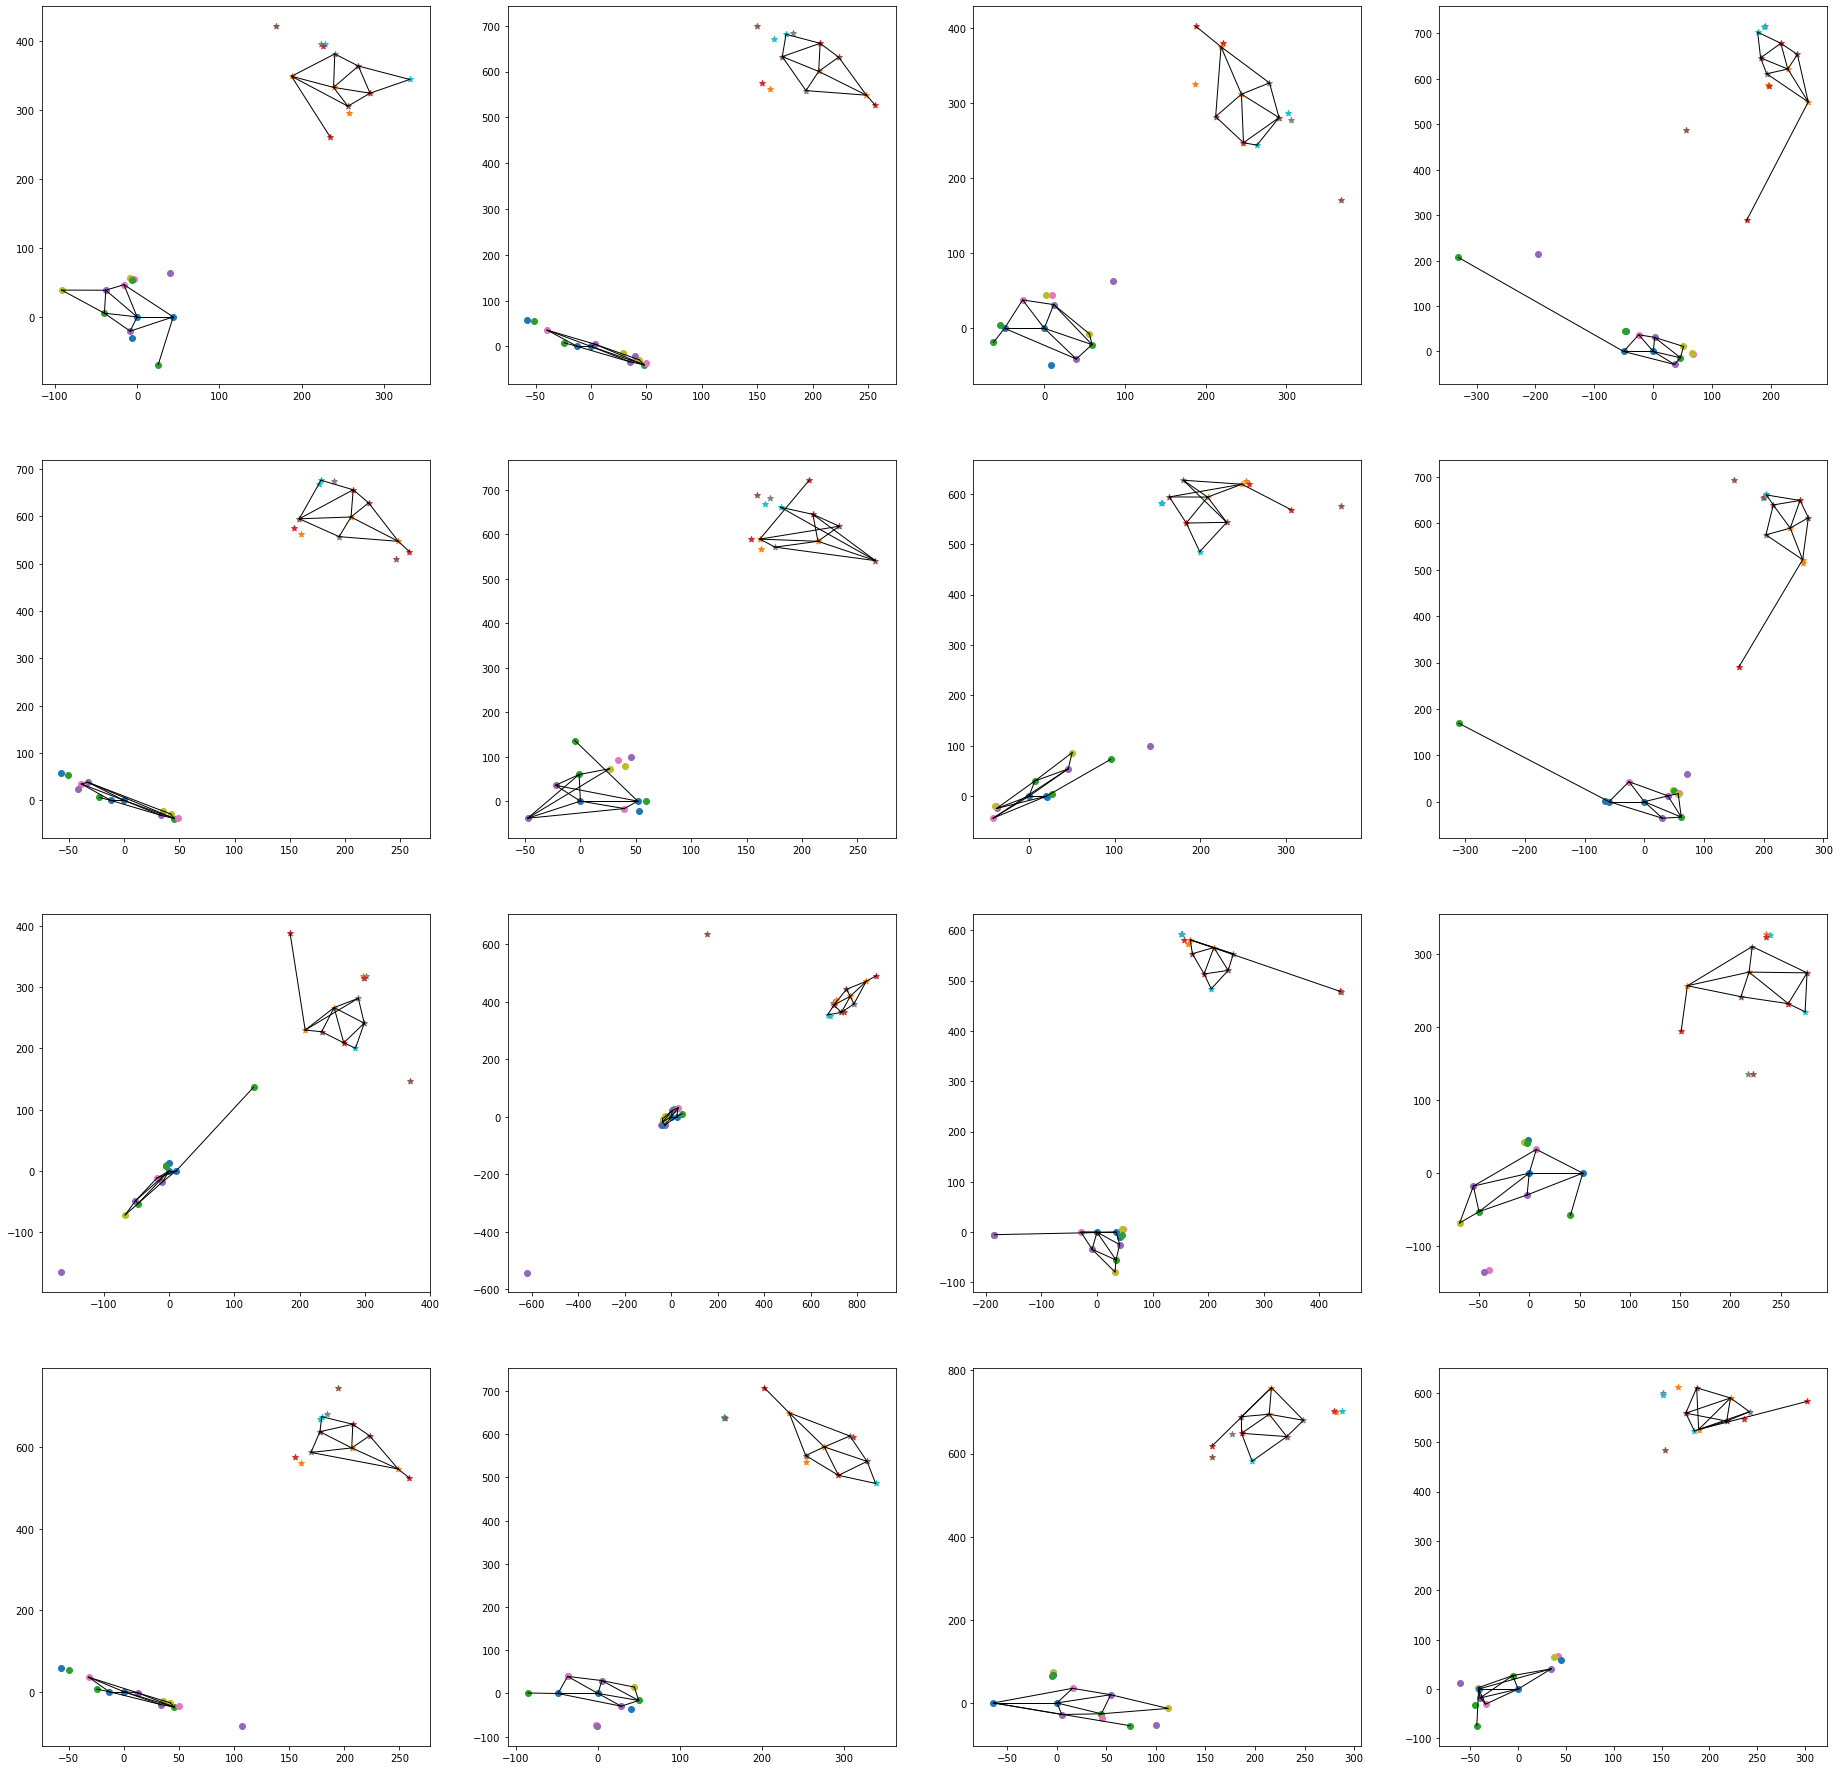

In [101]:
# subset = high_tailbase_likelihood.sample(n=20000)
# subset2 = subset.sample(n=16)
plotter(to_plot=subset2, skeleton=skeleton, indexes=subset2.index, plot_original_df=True, original_df=original_df, limits=False)

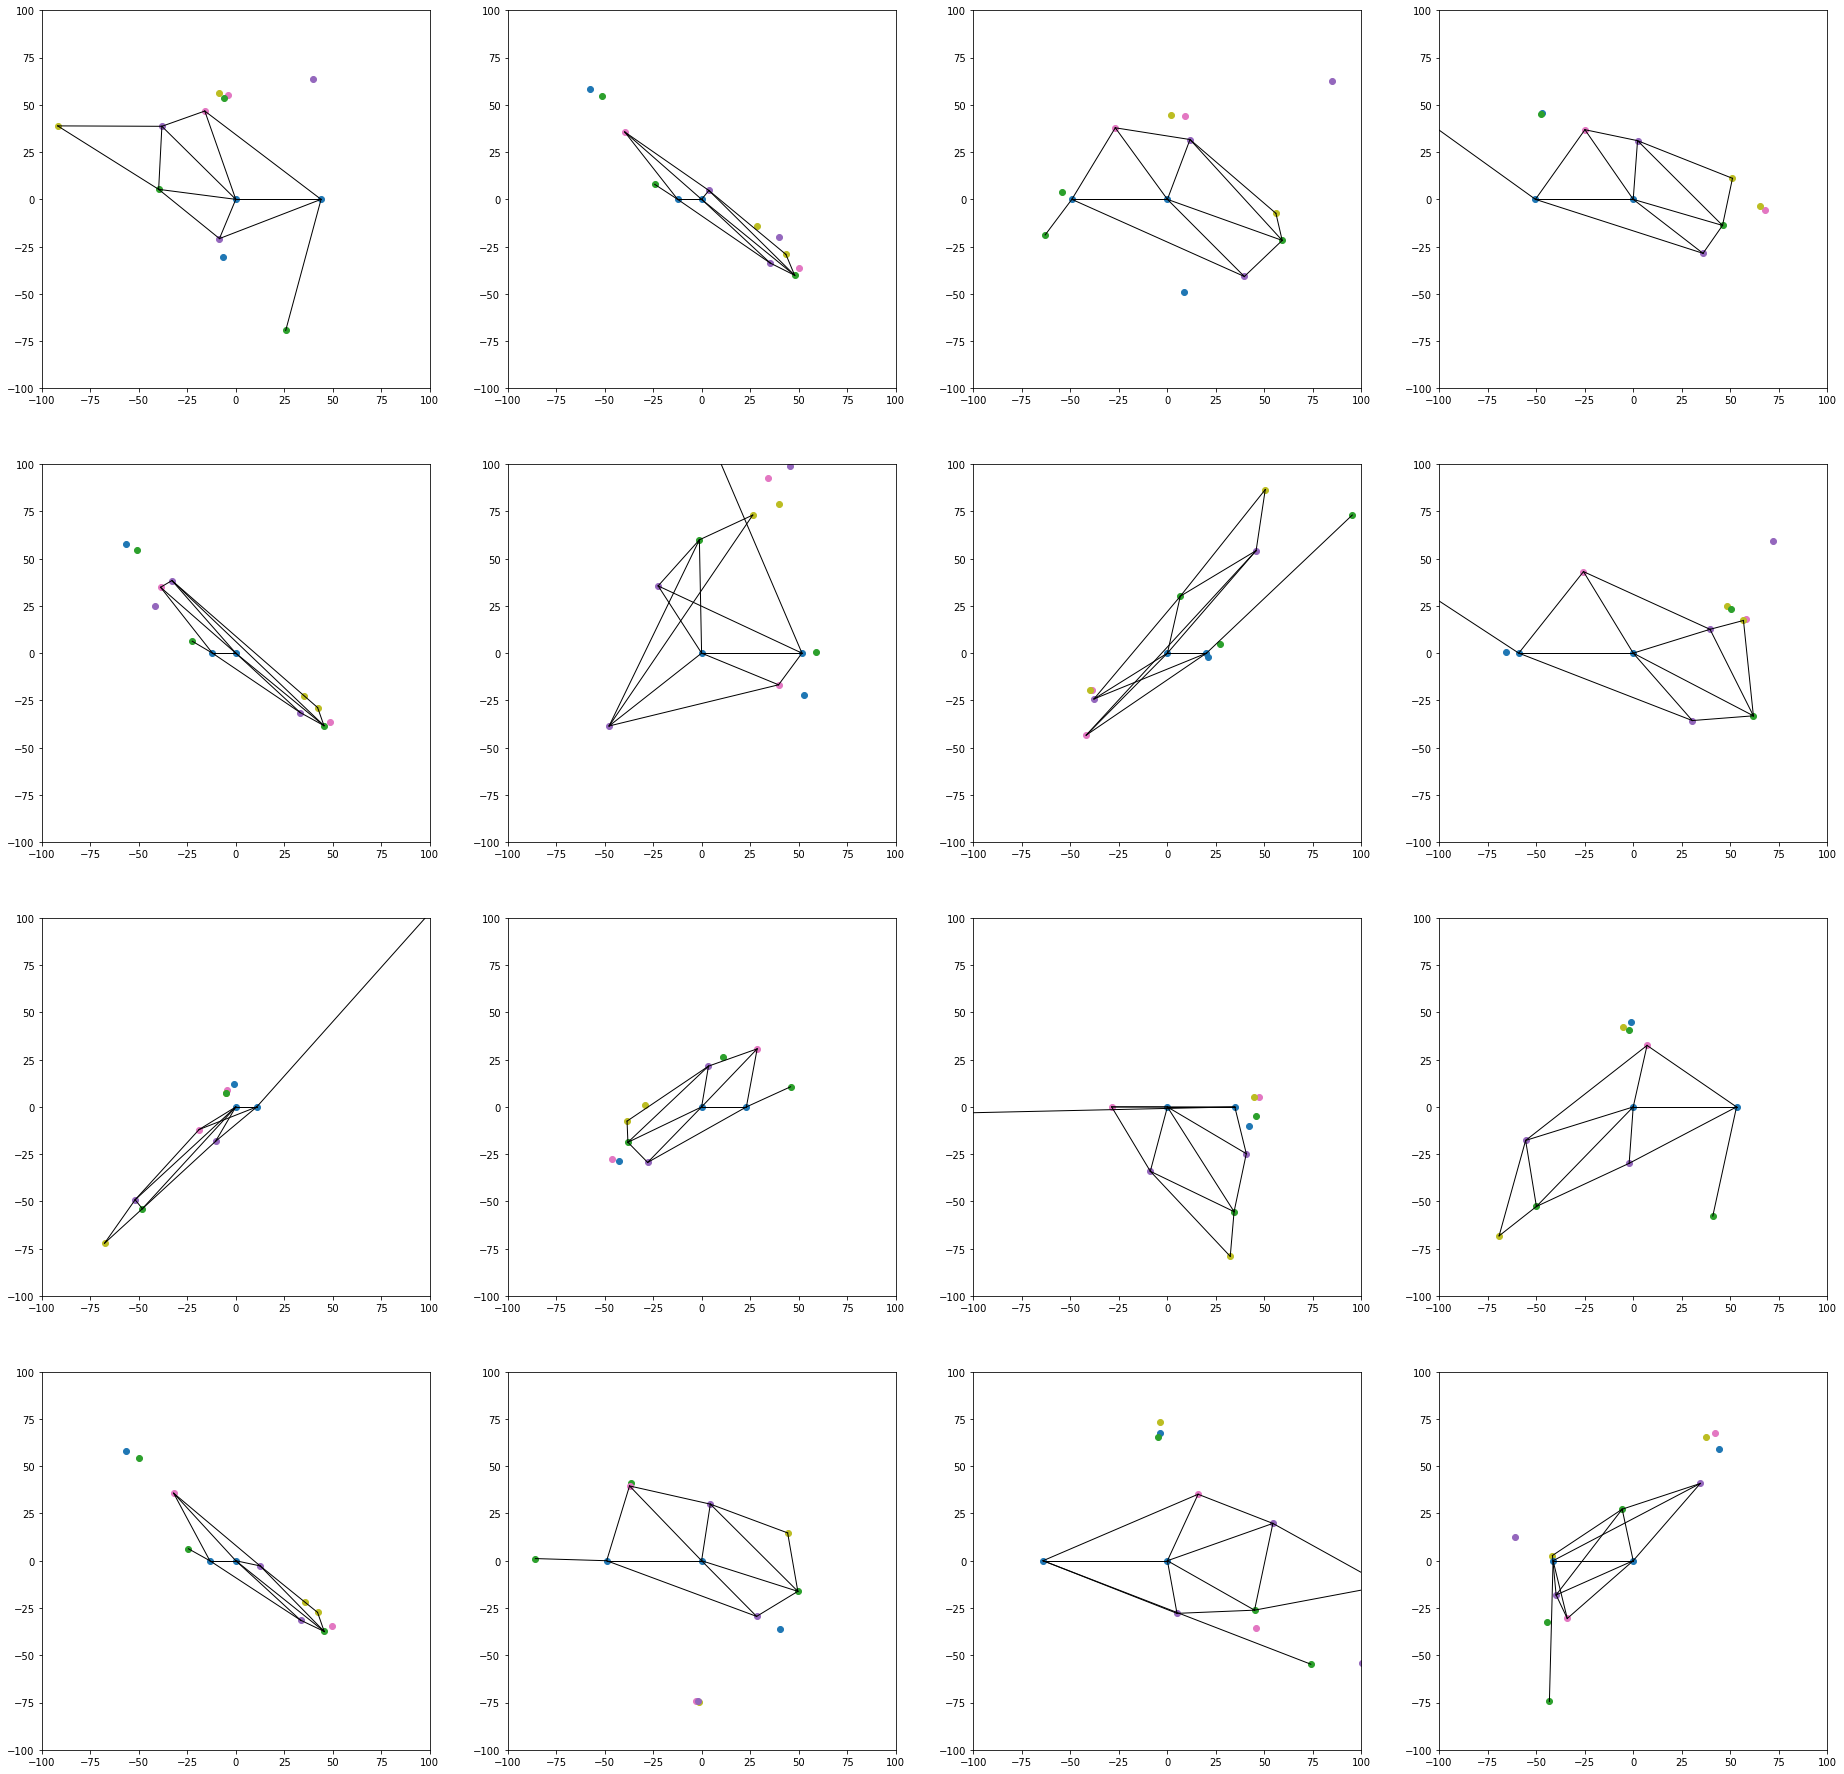

In [46]:
plotter(to_plot=subset2, skeleton=skeleton, indexes=subset2.index, plot_original_df=True, original_df=original_df,
        lim_min=-100, lim_max=100)

In [47]:
original_df.loc[subset2.index, :]

angles = np.arctan2(original_df.loc[subset2.index, :][('tail_base', 'y')], original_df.loc[subset2.index, :]['tail_base', 'x'])

angles

22617    1.077110
83612    1.145114
26781    1.042511
91315    1.124453
87947    1.144710
73924    1.302607
52133    1.188824
63881    1.100581
1307     0.833806
44546    0.511693
91786    1.289173
7        1.021005
89324    1.143497
40361    1.226246
39521    1.292656
91710    1.226121
dtype: float64

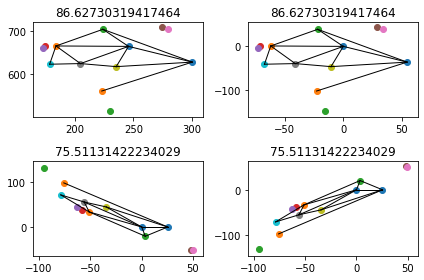

In [98]:
pd.set_option('mode.chained_assignment', None)

# subset.iloc[8].name
df = original_df.iloc[[subset.iloc[8].name]]

center = df['center']
        
plt.figure()
plt.subplot(2,2,1)
for bp in df.columns.levels[0]:
            
    plt.scatter(x=df.loc[subset.iloc[8].name, (bp, 'x')], y=df.loc[subset.iloc[8].name, (bp, 'y')], cmap='jet', )

for bp_pair in skeleton:

    plt.plot([df.loc[subset.iloc[8].name, (bp_pair[0], 'x')], df.loc[subset.iloc[8].name, (bp_pair[1], 'x')]],
            [df.loc[subset.iloc[8].name, (bp_pair[0], 'y')], df.loc[subset.iloc[8].name, (bp_pair[1], 'y')]],
            color = 'k', linestyle='-', linewidth=1)

x_left = df.loc[subset.iloc[8].name, ('left_side', 'x')]
x_right = df.loc[subset.iloc[8].name, ('right_side', 'x')]
y_left = df.loc[subset.iloc[8].name, ('left_side', 'y')]
y_right = df.loc[subset.iloc[8].name, ('right_side', 'y')]

plt.title(str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))
    
plt.subplot(2,2,2)

for bodypart in df.columns.levels[0]:
    for axis in df.columns.levels[1][1:]:
        df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)] - center.loc[:, axis]
        
for bp in df.columns.levels[0]:
            
    plt.scatter(x=df.loc[subset.iloc[8].name, (bp, 'x')], y=df.loc[subset.iloc[8].name, (bp, 'y')], cmap='jet', )

for bp_pair in skeleton:

    plt.plot([df.loc[subset.iloc[8].name, (bp_pair[0], 'x')], df.loc[subset.iloc[8].name, (bp_pair[1], 'x')]],
            [df.loc[subset.iloc[8].name, (bp_pair[0], 'y')], df.loc[subset.iloc[8].name, (bp_pair[1], 'y')]],
            color = 'k', linestyle='-', linewidth=1)

x_left = df.loc[subset.iloc[8].name, ('left_side', 'x')]
x_right = df.loc[subset.iloc[8].name, ('right_side', 'x')]
y_left = df.loc[subset.iloc[8].name, ('left_side', 'y')]
y_right = df.loc[subset.iloc[8].name, ('right_side', 'y')]

plt.title(str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))    
    
plt.subplot(2,2,3)

angle = np.arctan2(df[('tail_base', 'y')], df['tail_base', 'x'])

for bodypart in df.columns.levels[0]:
    bp_df = df.loc[:, bodypart]
    bp_x = bp_df['x']
    bp_y = bp_df['y']
    bp_likelihood = bp_df['likelihood']
    cos = np.cos(angle)
    sin = np.sin(angle)
    for axis in bp_df.columns:
        if axis == 'x':
            df.loc[:, (bodypart, axis)] = (bp_x * cos) - (bp_y * sin)
        elif axis == 'y':
            df.loc[:, (bodypart, axis)] = (bp_x * sin) - (bp_y * cos)
        elif axis == 'likelihood':
            df.loc[:, (bodypart, axis)] = bp_likelihood

for bp in df.columns.levels[0]:
            
    plt.scatter(x=df.loc[subset.iloc[8].name, (bp, 'x')], y=df.loc[subset.iloc[8].name, (bp, 'y')], cmap='jet', )

for bp_pair in skeleton:

    plt.plot([df.loc[subset.iloc[8].name, (bp_pair[0], 'x')], df.loc[subset.iloc[8].name, (bp_pair[1], 'x')]],
            [df.loc[subset.iloc[8].name, (bp_pair[0], 'y')], df.loc[subset.iloc[8].name, (bp_pair[1], 'y')]],
            color = 'k', linestyle='-', linewidth=1)
    
x_left = df.loc[subset.iloc[8].name, ('left_side', 'x')]
x_right = df.loc[subset.iloc[8].name, ('right_side', 'x')]
y_left = df.loc[subset.iloc[8].name, ('left_side', 'y')]
y_right = df.loc[subset.iloc[8].name, ('right_side', 'y')]

plt.title(str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))    
    
plt.subplot(2,2,4)

for bodypart in df.columns.levels[0]:
    bp_df = df.loc[:, bodypart]
    bp_x = bp_df['x']
    bp_y = bp_df['y']
    bp_likelihood = bp_df['likelihood']
    for axis in bp_df.columns:
        if axis == 'x':
            df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)]
        elif axis == 'y':
            df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)]*-1  # DON'T FORGET THAT YOU ADDED THIS!!!
        elif axis == 'likelihood':
            df.loc[:, (bodypart, axis)] = bp_likelihood
            
for bp in df.columns.levels[0]:
            
    plt.scatter(x=df.loc[subset.iloc[8].name, (bp, 'x')], y=df.loc[subset.iloc[8].name, (bp, 'y')], cmap='jet', )

for bp_pair in skeleton:

    plt.plot([df.loc[subset.iloc[8].name, (bp_pair[0], 'x')], df.loc[subset.iloc[8].name, (bp_pair[1], 'x')]],
            [df.loc[subset.iloc[8].name, (bp_pair[0], 'y')], df.loc[subset.iloc[8].name, (bp_pair[1], 'y')]],
            color = 'k', linestyle='-', linewidth=1)

x_left = df.loc[subset.iloc[8].name, ('left_side', 'x')]
x_right = df.loc[subset.iloc[8].name, ('right_side', 'x')]
y_left = df.loc[subset.iloc[8].name, ('left_side', 'y')]
y_right = df.loc[subset.iloc[8].name, ('right_side', 'y')]

plt.title(str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))
    
plt.tight_layout()

tsne fitted in --- 1517.8128008842468 seconds ---


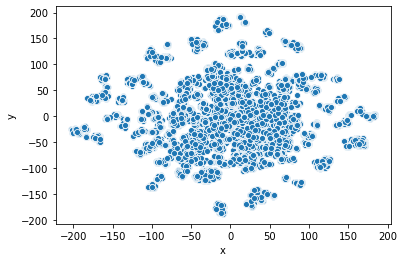

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, n_iter=20000, n_iter_without_progress=500, init='random', n_jobs=-1)

start_time = time.time()
transformed = tsne.fit_transform(subset)
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))

transformed = pd.DataFrame(transformed, columns=['x','y'])
sns.scatterplot(data=transformed, x='x', y='y')

transformed.index = subset.index

In [29]:
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))
print("tsne fitted in --- %s seconds ---" % (time.time() - start_time))

tsne fitted in --- 1518.108850479126 seconds ---
tsne fitted in --- 1518.108850479126 seconds ---
tsne fitted in --- 1518.108850479126 seconds ---
tsne fitted in --- 1518.108850479126 seconds ---
tsne fitted in --- 1518.109851360321 seconds ---
tsne fitted in --- 1518.109851360321 seconds ---


C:\Users\serce\Anaconda3\envs\behaviour-switching\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


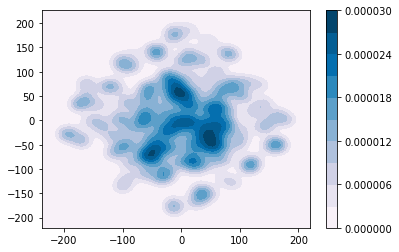

In [30]:
ax = sns.kdeplot(transformed, shade = True, cmap = "PuBu", cbar=True)

In [31]:
from sklearn.neighbors import KernelDensity

In [41]:
transformed = pd.DataFrame(transformed, columns=['x','y'])

kde = KernelDensity(kernel='gaussian', bandwidth=15)
start_time = time.time()
kde.fit(transformed)
print("fitted in --- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
scores = kde.score_samples(transformed)
print("scored in --- %s seconds ---" % (time.time() - start_time))
transformed['score'] = np.exp(scores)

fitted in --- 0.007666110992431641 seconds ---
scored in --- 15.562130212783813 seconds ---


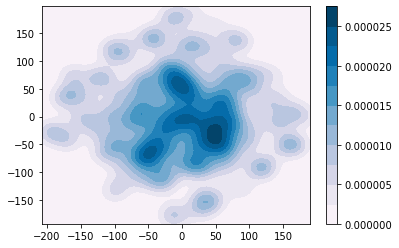

In [45]:
x = np.linspace(transformed['x'].min()-5, transformed['x'].max()+5, 100)
y = np.linspace(transformed['y'].min()-5, transformed['y'].max()+5, 100)
X, Y = np.meshgrid(x, y)

xy = np.vstack([X.ravel(), Y.ravel()]).T

Z = np.exp(kde.score_samples(xy))
Z = Z.reshape(X.shape)

plt.contourf(X, Y, Z, 12, cmap='PuBu')
plt.colorbar()

C:\Users\serce\Anaconda3\envs\behaviour-switching\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


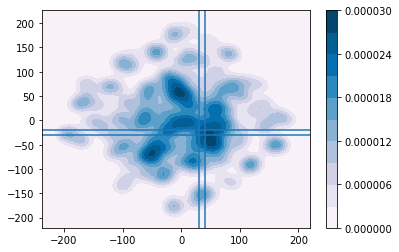

In [34]:
ax = sns.kdeplot(transformed, shade = True, cmap = "PuBu", cbar=True)
plt.axhline(-20)
plt.axhline(-30)
plt.axvline(30)
plt.axvline(40)

In [ ]:
x_filtered = transformed[(transformed['x'] > 30) & (transformed['x'] < 40)]
y_filtered = x_filtered[(x_filtered['y'] > -30) & (x_filtered['y'] < -20)]
filtered_subset = y_filtered.sample(16)
print(filtered_subset.index)
plotter(subset, skeleton, filtered_subset.index)

In [ ]:
# import pims
# vid = pims.Video(r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_videos\processed\chr8_day3.mp4")
# frames = []
# for index in filtered_subset.index:
#     frames.append(vid[index])
    
plt.imshow(frames[12])
plt.axvline(155.888)
plt.axhline(741.792)

In [ ]:
print(original_df.iloc[39631])

In [ ]:
plt.imshow(Z)
plt.colorbar()

----------------------------------------

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=30, init='k-means++', n_init=30, max_iter=3000, tol=0.0001, algorithm='auto')
transformed_km = km.fit_transform(subset)

In [ ]:
sns.scatterplot(data=transformed, x='x', y='y', hue=km.labels_)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True, svd_solver='full')

pca_transformed = pca.fit_transform(subset)

expVar = pd.DataFrame(data=pca.explained_variance_ratio_, columns=['explained variance ratio'])
expVar
sns.barplot(data=expVar, y='explained variance ratio', x=list(range(1,27)))

In [ ]:
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=km.labels_)

In [ ]:
#index = transformed[transformed['y'] < 28].index

#to_plot = df.iloc[index, :]

#plotter(subset, skeleton, to_plot.index[:16])

# StackOverflow Question

In [148]:
original_df[:50000].to_hdf(r"C:\Users\serce\Desktop\original_df.hdf", key='original')

In [149]:
original_df[:50000]

bodyparts    left_ear                          right_ear              \
coords              x           y likelihood           x           y   
0          256.999146  254.371643   0.665878  259.786835  300.815247   
1          256.223694  250.408066   0.634811  263.930878  297.045868   
2          259.578400  243.381378   0.770484  264.975098  292.010895   
3          258.627014  240.079453   0.888424  267.032104  288.877533   
4          260.325165  236.653473   0.829050  269.483978  285.743622   
...               ...         ...        ...         ...         ...   
49995      207.661514  578.544739   0.909719  251.343216  557.630371   
49996      205.851364  578.505249   0.908508  249.407196  555.505188   
49997      201.741501  575.895752   0.935880  246.950104  556.283630   
49998      200.881744  572.875244   0.926465  243.938400  554.634521   
49999      202.357437  573.406067   0.842154  244.113510  553.616333   

bodyparts                  snout                             center  ...  \
coords    likelihood           x           y likelihood           x  ...   
0           0.912561  302.207336  305.097656   0.586905  211.327377  ...   
1           0.959785  300.441895  302.299561   0.425324  214.384003  ...   
2           0.970840  274.904083  226.480453   0.180888  215.269073  ...   
3           0.947360  272.145874  224.416138   0.241777  216.176254  ...   
4           0.865554  273.617065  221.568527   0.304871  216.413101  ...   
...              ...         ...         ...        ...         ...  ...   
49995       0.896352  200.622238  519.735962   0.537557  244.222870  ...   
49996       0.934711  199.582703  518.323425   0.759931  246.043503  ...   
49997       0.946773  196.545395  517.451111   0.918199  243.903351  ...   
49998       0.958193  196.277634  514.337463   0.955468  244.894592  ...   
49999       0.962094  196.648041  511.817719   0.939527  242.655411  ...   

bodyparts paw_f_left paw_h_right                         paw_h_left  \
coords    likelihood           x           y likelihood           x   
0           0.056478  242.337555  328.168152   0.128356  220.902557   
1           0.033244  235.231750  329.351746   0.649704  220.172058   
2           0.028110  230.317276  328.397583   0.753278  230.791489   
3           0.038318  231.447205  327.648346   0.802185  230.852127   
4           0.037902  231.515854  326.717926   0.779997  231.388901   
...              ...         ...         ...        ...         ...   
49995       0.037193  269.475586  562.606018   0.129983  232.975021   
49996       0.041000  269.192291  561.451355   0.086437  196.479309   
49997       0.032118  235.009918  514.457092   0.132124  235.790970   
49998       0.033765  235.400833  516.210510   0.086482  235.490540   
49999       0.046502  235.337585  516.972290   0.096711  233.940811   

bodyparts                           tail_tip                         
coords              y likelihood           x           y likelihood  
0          235.826447   0.216726  231.392685  140.085114   0.987379  
1          234.149719   0.276334  226.247208  138.792816   0.985695  
2          331.914093   0.219428  221.661163  135.492203   0.977671  
3          332.067322   0.261315  220.567963  135.021484   0.977436  
4          332.199677   0.223375  223.157043  135.741180   0.976100  
...               ...        ...         ...         ...        ...  
49995      514.572449   0.065612  145.003830  577.714905   0.696980  
49996      606.400513   0.104416  144.872284  576.881287   0.827321  
49997      514.619324   0.226241  144.319031  579.202271   0.654651  
49998      515.293884   0.172957  143.569183  577.249329   0.360204  
49999      515.101501   0.221480  144.782455  579.781128   0.165001  

[50000 rows x 39 columns]

In [150]:
df = original_df.copy(deep=True)

center = df['center']

for bodypart in df.columns.levels[0]:
    for axis in df.columns.levels[1][1:]:
        df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)] - center.loc[:, axis]

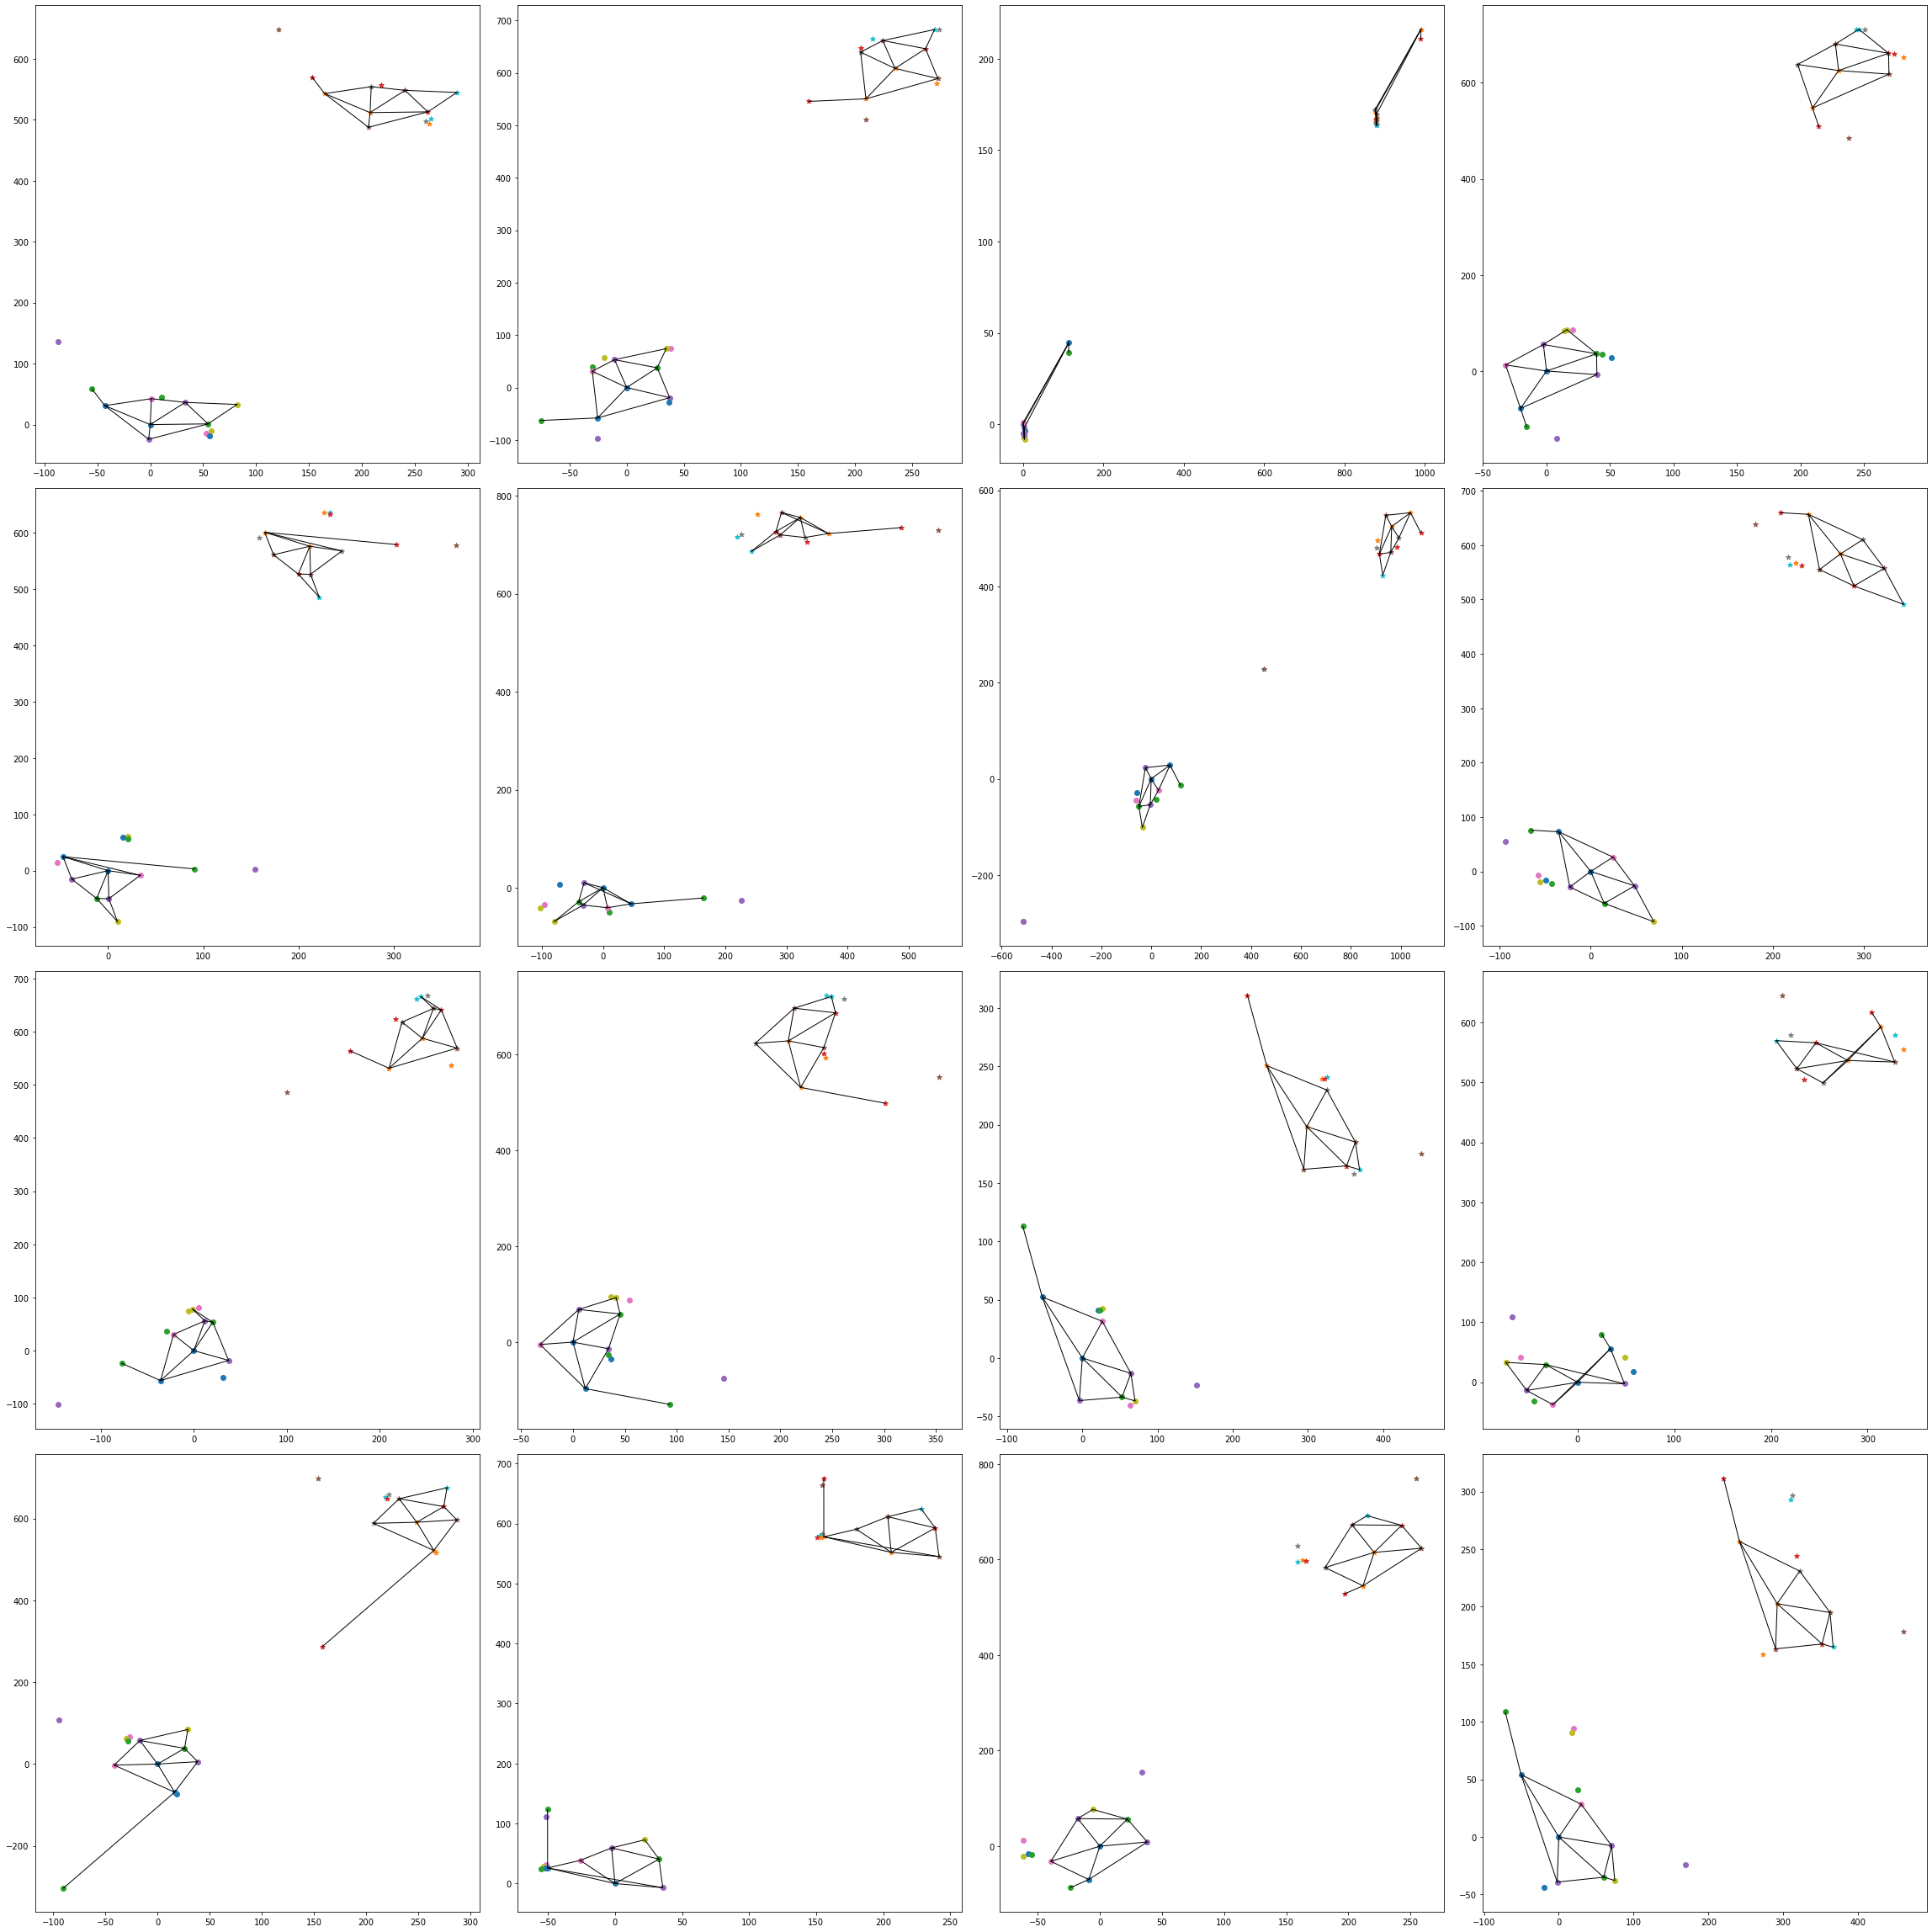

In [151]:
def plotter(to_plot, skeleton, indexes, plot_original_df=False, original_df=None, lim_min=-800, lim_max=800, limits=True):
    plt.figure(figsize=(32,32))
    indexcounter=1
    for i in indexes:
        
        plt.subplot(4,4,indexcounter)
        
        for bp in df.columns.levels[0]:
            
            plt.scatter(x=to_plot.loc[i, (bp, 'x')], y=to_plot.loc[i, (bp, 'y')], cmap='jet', )
            if plot_original_df:
                plt.scatter(x=original_df.loc[i, (bp, 'x')], y=original_df.loc[i, (bp, 'y')], cmap='jet', marker='*')
        
        for bp_pair in skeleton:
            
            plt.plot([to_plot.loc[i, (bp_pair[0], 'x')], to_plot.loc[i, (bp_pair[1], 'x')]],
                    [to_plot.loc[i, (bp_pair[0], 'y')], to_plot.loc[i, (bp_pair[1], 'y')]],
                    color = 'k', linestyle='-', linewidth=1)
            if plot_original_df:
                plt.plot([original_df.loc[i, (bp_pair[0], 'x')], original_df.loc[i, (bp_pair[1], 'x')]],
                    [original_df.loc[i, (bp_pair[0], 'y')], original_df.loc[i, (bp_pair[1], 'y')]],
                    color = 'k', linestyle='-', linewidth=1)

        indexcounter +=1
        if limits:
            plt.xlim(lim_min, lim_max)
            plt.ylim(lim_min, lim_max)
    
    plt.tight_layout()
#     plt.savefig(r"C:\Users\serce\Desktop\comparison.png")
    plt.show()
    
subset = df.sample(n=16, random_state=1)
subset2 = subset.copy(deep=True) # This will come in handy later on when plotting the original vs moved vs rotated.
skeleton = [['snout', 'left_ear'], ['snout', 'right_ear'], ['right_ear', 'left_ear'], ['left_ear', 'left_side'],
           ['right_ear', 'right_side'], ['right_side', 'tail_base'], ['left_side', 'tail_base'],
            ['tail_base', 'tail_mid'], ['center', 'left_ear'], ['center', 'right_ear'],
           ['center', 'right_side'], ['left_side', 'center'], ['tail_base', 'center']]
plotter(to_plot=subset, skeleton=skeleton, indexes=subset.index, plot_original_df=True, original_df=original_df,
       limits=False)

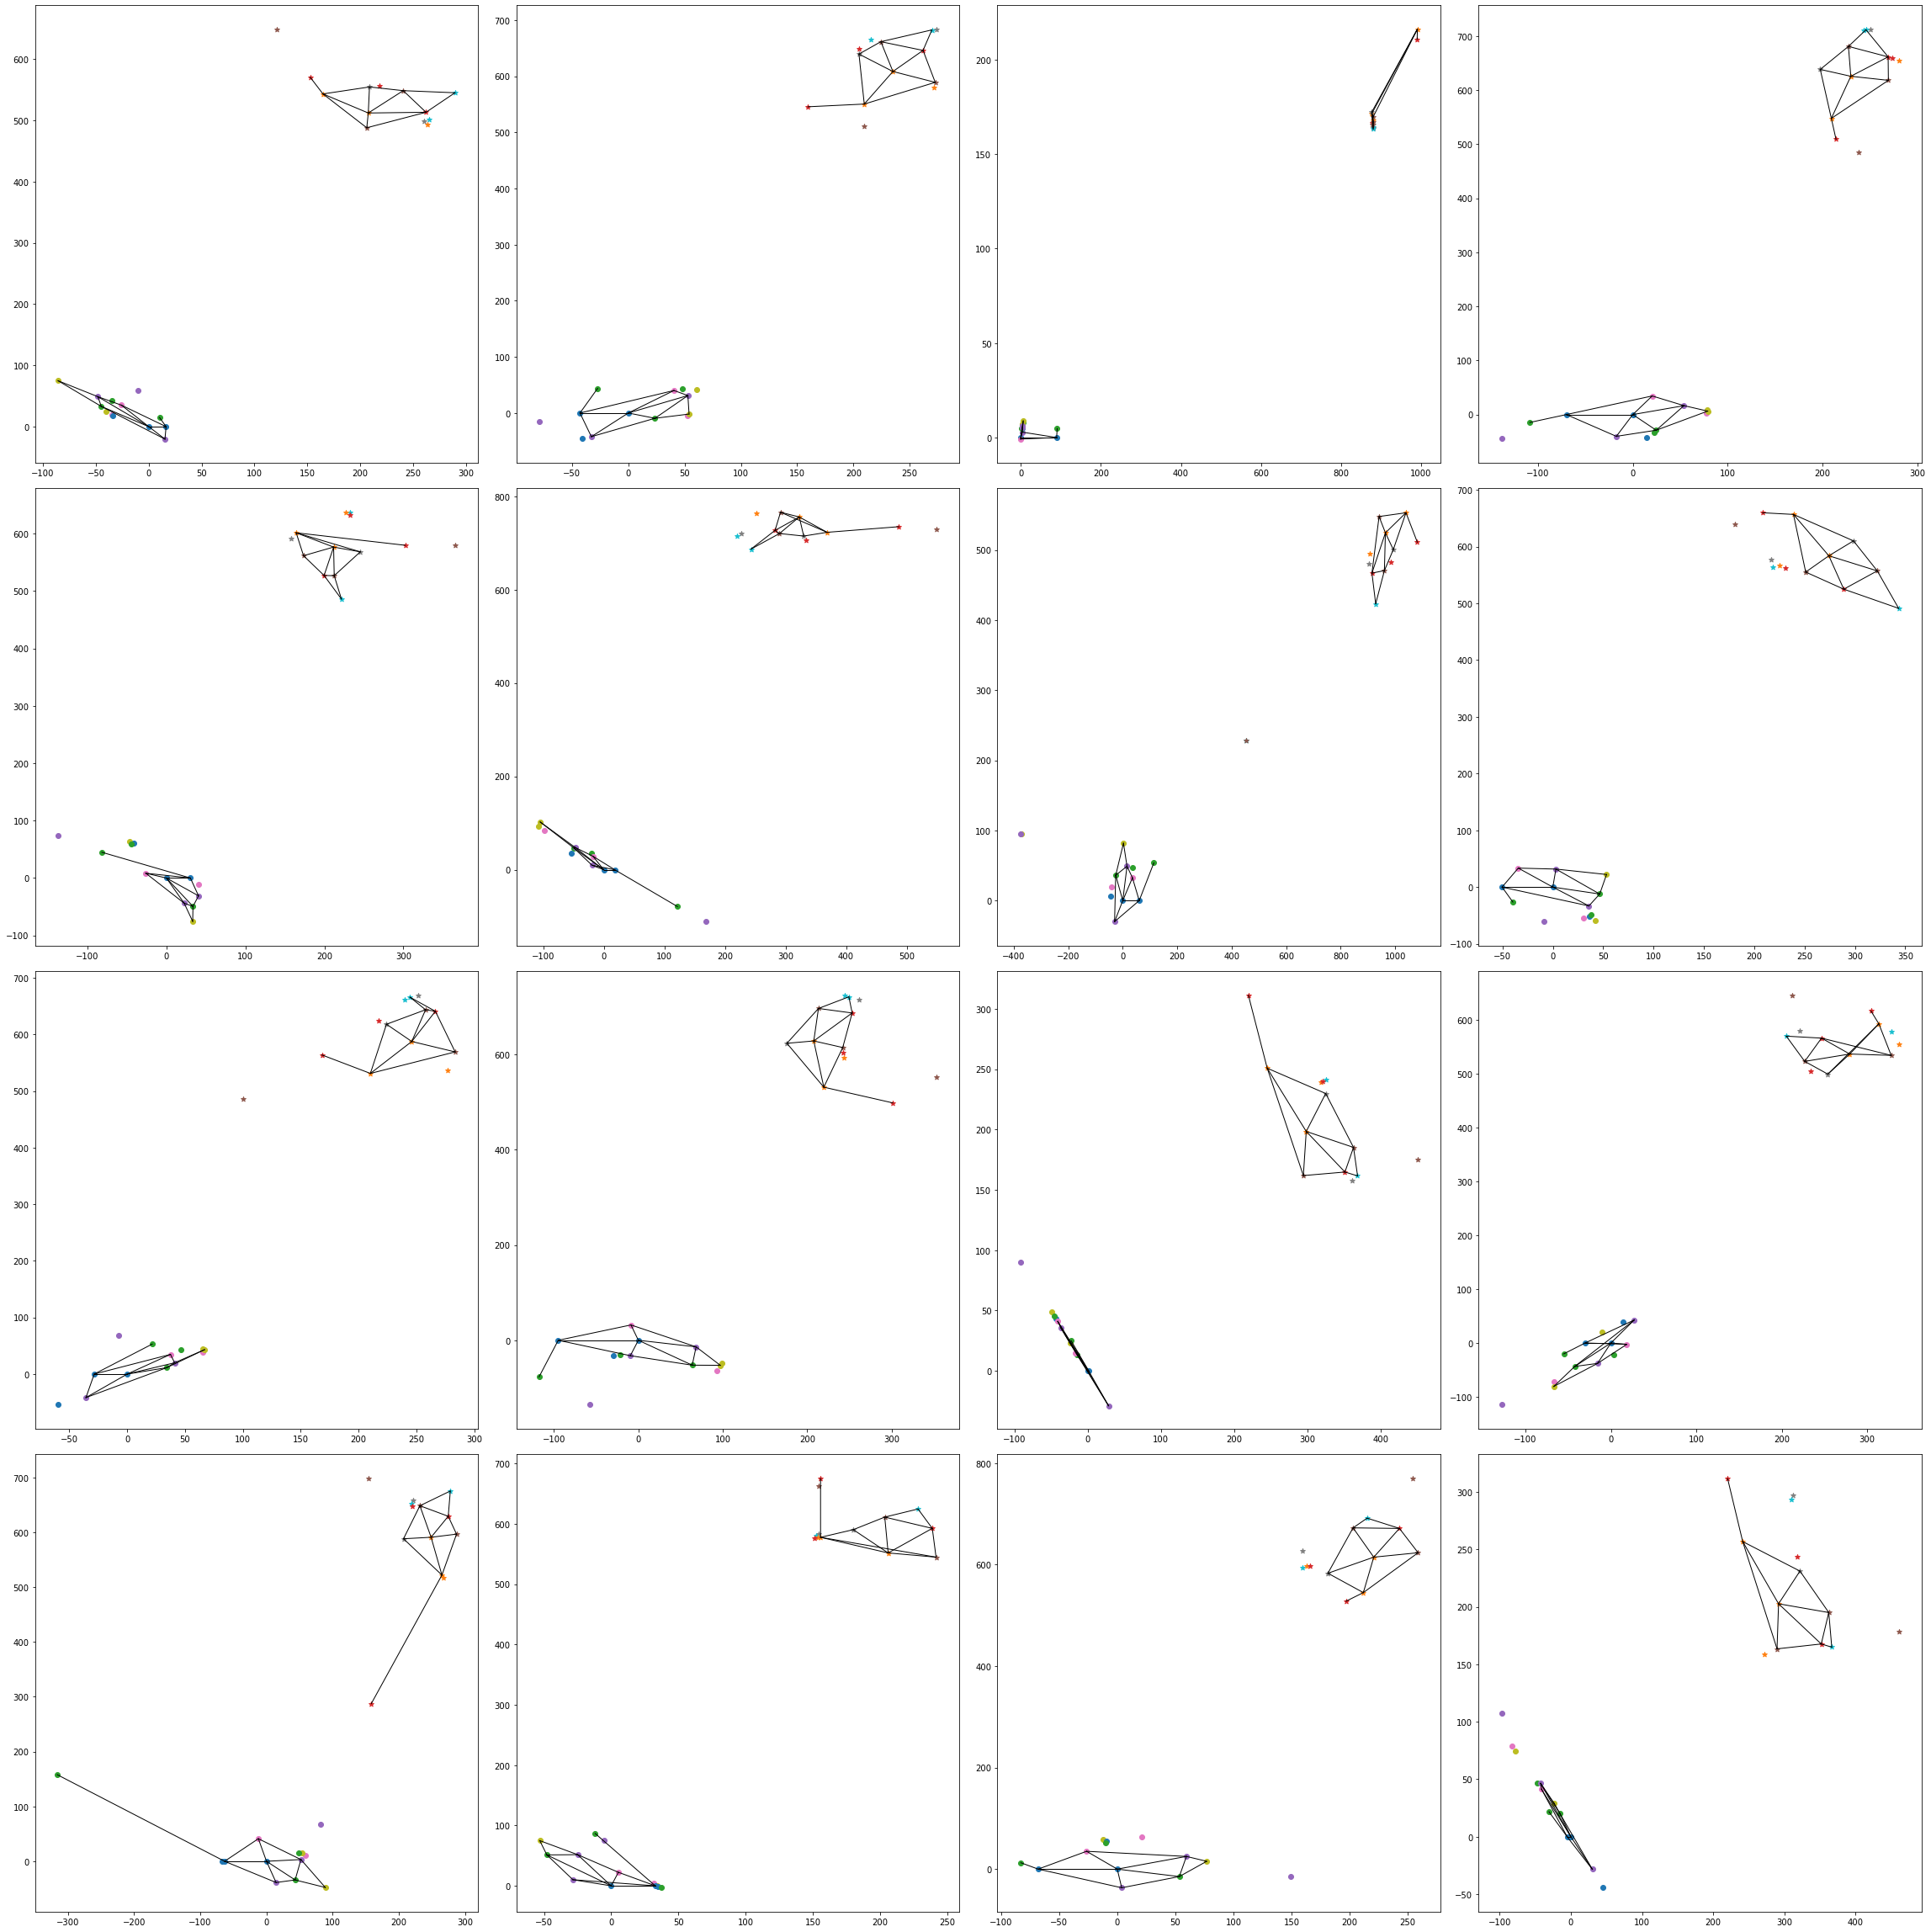

In [152]:
subset = subset2.copy(deep=True)
angles = np.arctan2(subset.loc[:, ('tail_base', 'y')], subset.loc[:, ('tail_base', 'x')]) # in radians

for bodypart in subset.columns.levels[0]:
    bp_df = subset.loc[:, bodypart]
    bp_x = bp_df['x']
    bp_y = bp_df['y']
    bp_likelihood = bp_df['likelihood']
    cos = np.cos(angles)
    sin = np.sin(angles)
    for axis in bp_df.columns:
        if axis == 'x':
            subset.loc[:, (bodypart, axis)] = (bp_x * cos) - (bp_y * sin)
        elif axis == 'y':
            subset.loc[:, (bodypart, axis)] = (bp_x * sin) - (bp_y * cos)
        elif axis == 'likelihood':
            subset.loc[:, (bodypart, axis)] = bp_likelihood
            
plotter(to_plot=subset, skeleton=skeleton, indexes=subset.index, plot_original_df=True,
        original_df=original_df.loc[subset.index, :], limits=False)

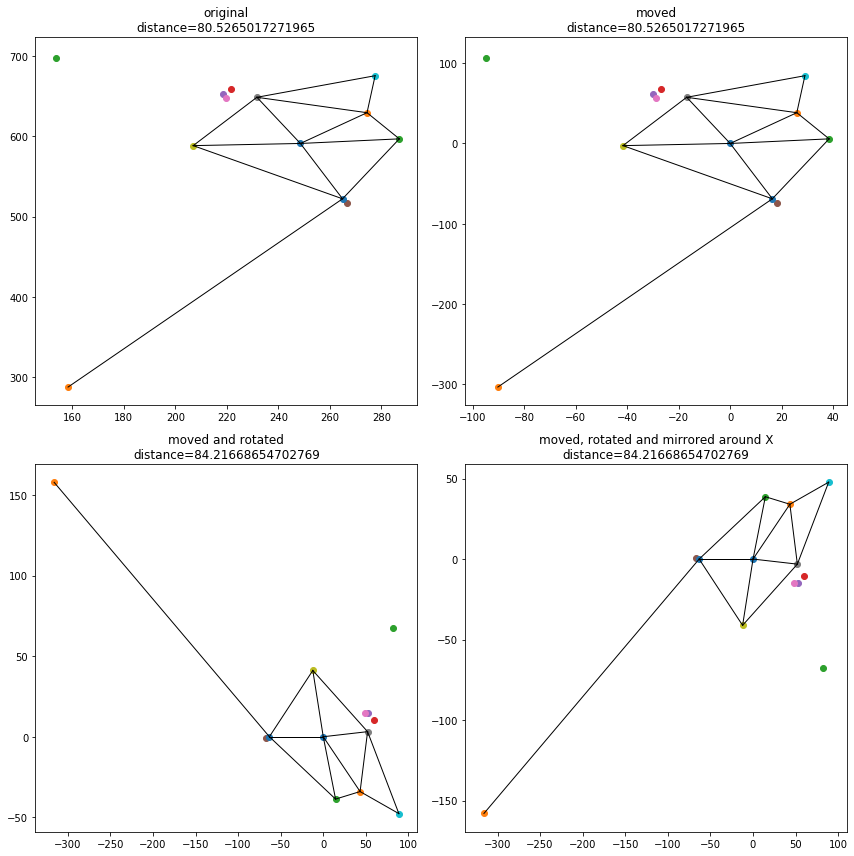

In [153]:
pd.set_option('mode.chained_assignment', None)

subset = subset2.copy(deep=True)
idx = subset.iloc[12].name
df = original_df.iloc[[idx]]

center = df['center']
        
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
for bp in df.columns.levels[0]:
            
    plt.scatter(x=df.loc[idx, (bp, 'x')], y=df.loc[idx, (bp, 'y')], cmap='jet', )

for bp_pair in skeleton:

    plt.plot([df.loc[idx, (bp_pair[0], 'x')], df.loc[idx, (bp_pair[1], 'x')]],
            [df.loc[idx, (bp_pair[0], 'y')], df.loc[idx, (bp_pair[1], 'y')]],
            color = 'k', linestyle='-', linewidth=1)

x_left = df.loc[idx, ('left_side', 'x')]
x_right = df.loc[idx, ('right_side', 'x')]
y_left = df.loc[idx, ('left_side', 'y')]
y_right = df.loc[idx, ('right_side', 'y')]

plt.title('original' + '\n' + 'distance=' + str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))
    
plt.subplot(2,2,2)

for bodypart in df.columns.levels[0]:
    for axis in df.columns.levels[1][1:]:
        df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)] - center.loc[:, axis]
        
for bp in df.columns.levels[0]:
            
    plt.scatter(x=df.loc[idx, (bp, 'x')], y=df.loc[idx, (bp, 'y')], cmap='jet', )

for bp_pair in skeleton:

    plt.plot([df.loc[idx, (bp_pair[0], 'x')], df.loc[idx, (bp_pair[1], 'x')]],
            [df.loc[idx, (bp_pair[0], 'y')], df.loc[idx, (bp_pair[1], 'y')]],
            color = 'k', linestyle='-', linewidth=1)

x_left = df.loc[idx, ('left_side', 'x')]
x_right = df.loc[idx, ('right_side', 'x')]
y_left = df.loc[idx, ('left_side', 'y')]
y_right = df.loc[idx, ('right_side', 'y')]

plt.title('moved' + '\n' + 'distance=' + str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))    
    
plt.subplot(2,2,3)

angle = np.arctan2(df[('tail_base', 'y')], df['tail_base', 'x'])

for bodypart in df.columns.levels[0]:
    bp_df = df.loc[:, bodypart]
    bp_x = bp_df['x']
    bp_y = bp_df['y']
    bp_likelihood = bp_df['likelihood']
    cos = np.cos(angle)
    sin = np.sin(angle)
    for axis in bp_df.columns:
        if axis == 'x':
            df.loc[:, (bodypart, axis)] = (bp_x * cos) - (bp_y * sin)
        elif axis == 'y':
            df.loc[:, (bodypart, axis)] = (bp_x * sin) - (bp_y * cos)
        elif axis == 'likelihood':
            df.loc[:, (bodypart, axis)] = bp_likelihood

for bp in df.columns.levels[0]:
            
    plt.scatter(x=df.loc[idx, (bp, 'x')], y=df.loc[idx, (bp, 'y')], cmap='jet', )

for bp_pair in skeleton:

    plt.plot([df.loc[idx, (bp_pair[0], 'x')], df.loc[idx, (bp_pair[1], 'x')]],
            [df.loc[idx, (bp_pair[0], 'y')], df.loc[idx, (bp_pair[1], 'y')]],
            color = 'k', linestyle='-', linewidth=1)
    
x_left = df.loc[idx, ('left_side', 'x')]
x_right = df.loc[idx, ('right_side', 'x')]
y_left = df.loc[idx, ('left_side', 'y')]
y_right = df.loc[idx, ('right_side', 'y')]

plt.title('moved and rotated' + '\n' + 'distance=' + str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))    
    
plt.subplot(2,2,4)

for bodypart in df.columns.levels[0]:
    bp_df = df.loc[:, bodypart]
    bp_x = bp_df['x']
    bp_y = bp_df['y']
    bp_likelihood = bp_df['likelihood']
    for axis in bp_df.columns:
        if axis == 'x':
            df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)]
        elif axis == 'y':
            df.loc[:, (bodypart, axis)] = df.loc[:, (bodypart, axis)]*-1  # DON'T FORGET THAT YOU ADDED THIS!!!
        elif axis == 'likelihood':
            df.loc[:, (bodypart, axis)] = bp_likelihood
            
for bp in df.columns.levels[0]:
            
    plt.scatter(x=df.loc[idx, (bp, 'x')], y=df.loc[idx, (bp, 'y')], cmap='jet', )

for bp_pair in skeleton:

    plt.plot([df.loc[idx, (bp_pair[0], 'x')], df.loc[idx, (bp_pair[1], 'x')]],
            [df.loc[idx, (bp_pair[0], 'y')], df.loc[idx, (bp_pair[1], 'y')]],
            color = 'k', linestyle='-', linewidth=1)

x_left = df.loc[idx, ('left_side', 'x')]
x_right = df.loc[idx, ('right_side', 'x')]
y_left = df.loc[idx, ('left_side', 'y')]
y_right = df.loc[idx, ('right_side', 'y')]

plt.title('moved, rotated and mirrored around X' + '\n' + 'distance=' + str(np.sqrt( ((y_left-y_right)**2) + ((x_left-x_right)**2) )))
    
plt.tight_layout()
plt.savefig(r"C:\Users\serce\Desktop\distances.png")

In [158]:
subset.to_numpy()

array([[ 5.45894165e+01,  1.16390991e+00,  9.59324241e-01,
         3.30415039e+01,  3.64559631e+01,  9.89488244e-01,
         8.19753113e+01,  3.30259705e+01,  9.93287563e-01,
         0.00000000e+00,  0.00000000e+00,  9.76419568e-01,
        -1.43544006e+00, -2.41083069e+01,  6.47946358e-01,
         1.13076782e+00,  4.25027161e+01,  8.13814461e-01,
        -4.28450012e+01,  3.11124573e+01,  8.70228708e-02,
        -5.49139099e+01,  5.82867737e+01,  8.24683189e-01,
         5.75264282e+01, -1.04912109e+01,  3.16708386e-02,
         5.27816162e+01, -1.37033691e+01,  3.07163000e-02,
         1.04447479e+01,  4.49514465e+01,  1.61819905e-01,
         5.57201843e+01, -1.85232544e+01,  4.00597900e-01,
        -8.66571045e+01,  1.36444366e+02,  2.79389679e-01],
       [ 2.67579803e+01,  3.75720825e+01,  9.29591894e-01,
        -1.06963654e+01,  5.30949097e+01,  9.26314712e-01,
         3.45880585e+01,  7.40843506e+01,  9.90233421e-01,
         0.00000000e+00,  0.00000000e+00,  9.75068331e-